# Домашнее задание по интервалам оценок в Python

Всего четрые задачи: две простых и две непростых. В последней необходимо проделать небольшую теоретическую работу.

## Справка по теории к задачам по доверительным интервалам

### 1. Основные понятия доверительных интервалов
Доверительный интервал (CI) – это диапазон значений, который, с определенной вероятностью, содержит истинное значение параметра распределения. 

**Формула для нормального доверительного интервала:**
\begin{equation}
CI = \hat{\theta} \pm z_{\alpha/2} \cdot SE(\hat{\theta})
\end{equation}
где $\hat{\theta}$ – точечная оценка параметра, $SE(\hat{\theta})$ – стандартная ошибка, а $z_{\alpha/2}$ – квантиль нормального распределения.

### 2. Методы построения доверительных интервалов
#### 2.1. Классический метод на основе информации Фишера
Если оценка параметра $\hat{\theta}$ асимптотически нормально распределена, доверительный интервал определяется через стандартную ошибку:
\begin{equation}
CI = \hat{\theta} \pm z_{\alpha/2} \cdot \frac{1}{\sqrt{I(\hat{\theta})}}
\end{equation}
где $I(\hat{\theta})$ – информация Фишера.

#### 2.2. Метод бутстрапа
Метод бутстрапа используется, когда стандартные предположения о распределении параметра нарушены. Основные шаги:
1. Генерируются бутстрап-выборки из исходных данных.
2. Для каждой выборки вычисляется оценка параметра.
3. Определяются квантильные границы интервала.

#### 2.3. Байесовские доверительные интервалы
В Байесовском подходе параметры моделируются как случайные величины. Доверительный интервал строится как область высокой плотности (HPDI - Highest Posterior Density Interval):
\begin{equation}
P(\theta_L \leq \theta \leq \theta_U | X) = 1 - \alpha.
\end{equation}

**Как вычислить HPDI**

Пусть у нас есть выборка $\mathbf{X}=(X_1,X_2,...,X_n)$ и соответствующая ей апостериорная плотность вероятности $f(\theta|\pi)$. Тогда HPDI с уровнем доверия $\alpha$ определяется как множество значений $\theta$, таких что:

$$ \text{HPDI}_{\alpha} = \{\theta : \pi(\theta | \mathbf{X}) > k\}$$

где $k$ выбирается таким образом, чтобы суммарная вероятность всех точек внутри этого множества была равна $\alpha$.

Другими словами, мы ищем такие значения $\theta$, для которых плотность вероятности больше некоторого порога $k$. Этот порог $k$ находится так, чтобы сумма вероятностей этих значений составляла заданный уровень доверия $\alpha$.
Алгоритм нахождения HPDI:

1. Сортировка: Отсортируйте все значения $\theta$ по убыванию плотности вероятности $f(\theta|\pi)$.
2. Итерации: Начните с первого элемента отсортированного списка и суммируйте вероятности до тех пор, пока их сумма не превысит $\alpha$. Все элементы, включенные в эту сумму, будут составлять HPDI.
3. Если сумма вероятностей не достигает $\alpha$, продолжайте добавлять следующие элементы из списка, пока не достигнете нужного уровня доверия.

Этот метод позволяет получить наиболее плотное распределение вероятностей, соответствующее уровню доверия $\alpha$.

### 3. Применение доверительных интервалов
В домашней работе предлагается рассмотреть следующие:
1. Построение классического доверительного интервала для параметра нормального распределения.
2. Использование бутстрапа для оценки устойчивости оценок.
3. Оценка параметра экспоненциального распределения методом максимального правдоподобия и построение доверительного интервала.
4. Байесовский анализ параметра распределения и сравнение различных методов построения доверительных интервалов.

Каждый метод имеет свои преимущества и недостатки. Выбор подходящего метода зависит от свойств данных, размера выборки и предположений о распределении параметра.

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

## Задача 1 ($\Sigma$ = 13б)
Неходимо построить доверительные интервалы для среднего нормального распределения:
1. (4б) Сгенерировать выборку из нормального распределения
2. (5б) Вычислить доверительный интервал для среднего
3. (4б) Визуализировать результаты

### --- Этап 1: Генерация выборки из нормального распределения ---

### --- Этап 2: Вычисление доверительного интервала для среднего ---

Доверительный интервал для среднего: (9.436311483053483, 10.148302447370142)


### --- Этап 3: Визуализация результатов ---

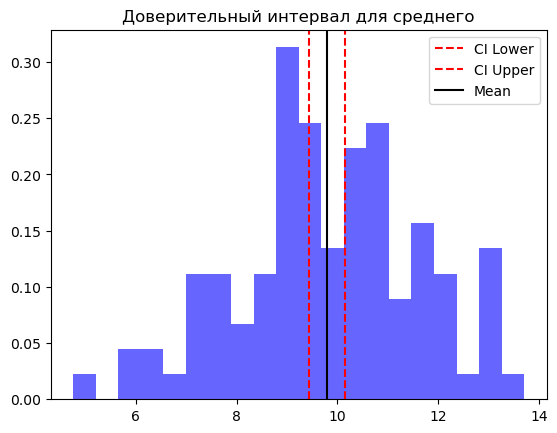

## Задача 2 ($\Sigma$ = 11б)
Используйте бутстрап-методы для анализа устойчивости доверительных интервалов
1. (2б) Добавьте в выборку из предыдущей задачи выбросы
2. (5б) Рассчитать доверительный интервал классическим способом и бутстрап-методом
3. (4б) Сравнить устойчивость интервалов

### --- Этап 1: Генерация выборки и добавление выбросов ---

### --- Этап 2: Расчет доверительных интервалов классическим способом и бутстрап-методом ---

Бутстрап-доверительный интервал: [ 9.8140936  13.10427056]


### --- Этап 3: Сравнение устойчивости интервалов ---

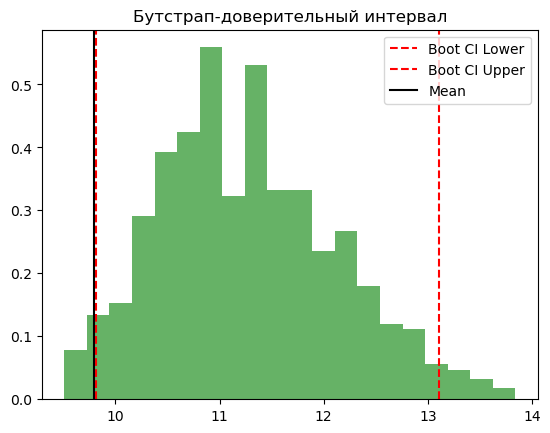

## Задача 3 ($\Sigma$ = 18б)
Метод максимального правдоподобия и доверительные интервалы
1. (5б) Постройте оценку параметра экспоненциального распределения методом максимального правдоподобия (ММП)
2. (6б) Постройте доверительный интервал для оценки параметра из предыдущего пункта
3. (7б) Сравнените доверительные интервалы: классический через ММП, бутстрап

In [8]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

In [9]:
# Генерация выборки


### --- Этап 1: Оценка параметра методом максимального правдоподобия ---

Оценка параметра λ методом ММП: 0.49785465511617305


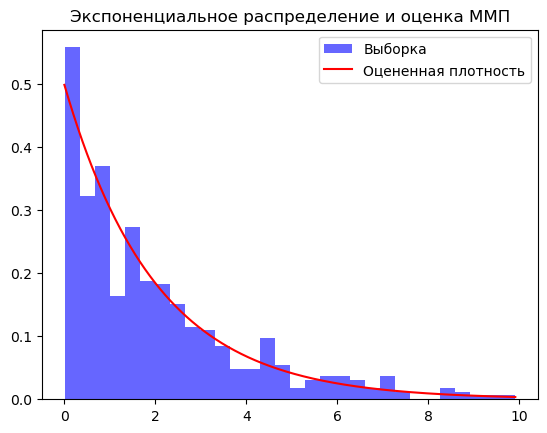

### --- Этап 2: Построение доверительного интервала ---

Доверительный интервал (ММП): (0.45421657240214247, 0.5414927378302037)


### --- Этап 3: Сравнение разных методов построения доверительных интервалов ---

Бутстрап-доверительный интервал: [0.45942406 0.54115678]


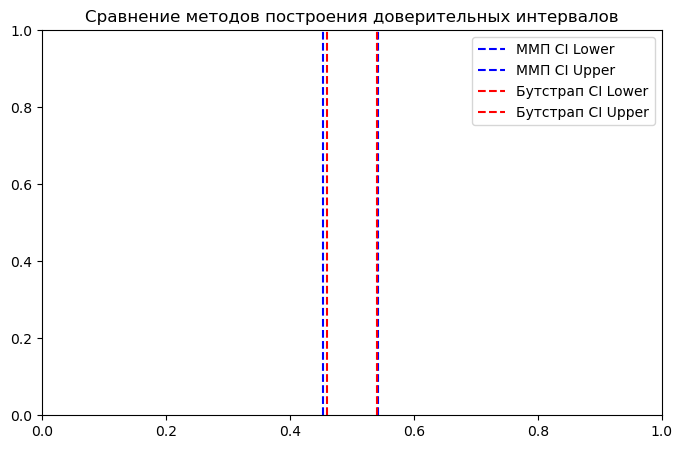

## Задача 4 ($\Sigma$ = 58б)
Доверительные интервалы и сравнение методов оценивания

Необходимо исследовать надежность доверительных интервалов при различных методах оценивания параметров

### Теоретическая часть: ($\Sigma$ = 12б)
(_ответ нужно выполнить на бумаге и прикрепить отдельным файлом PDF_)

Рассматривается случайная выборка $X_1, X_2, ..., X_n$ из экспоненциального распределения с параметром $\theta$. Предлагается использовать три метода оценивания параметра $\theta$:
   - **Метод моментов** (MM)
   - **Метод максимального правдоподобия** (MLE)
   - **Байесовский метод** (Bayesian)

Для каждого метода необходимо:
1. (4б) Найти точечную оценку параметра $\theta$.
2. (4б) Вывести формулы доверительных интервалов для $\theta$.
3. (4б) Сравнить свойства интервалов: ширина, устойчивость, покрытие.

### Практическая часть: ($\Sigma$ = 46б)

1. **Генерация данных:** (4б) Сгенерировать выборку из гамма-распределение с параметрами $\alpha, \beta$).

2. **Оценка параметров:** ($\Sigma$ = 18б)
   - (12б) Найти оценки $\theta$ методами MM, MLE и Bayesian.
   - (6б) Построить доверительные интервалы.

3. **Анализ и визуализация:** ($\Sigma$ = 12б)
   - (6б) Сравнить ширину доверительных интервалов.
   - (6б) Построить графики распределений оценок параметра.

4. **Выводы:** ($\Sigma$ = 12б)
   - (6б) Какой метод дает наиболее узкий интервал?
   - (6б) Как методы реагируют на небольшие изменения в данных?

## Практическая часть

In [14]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

### --- Этап 1: Генерация данных ---

### --- Этап 2: Метод моментов ---

### --- Этап 3: Метод максимального правдоподобия ---

### --- Этап 4: Байесовский подход ---

### --- Этап 5: Визуализация ---

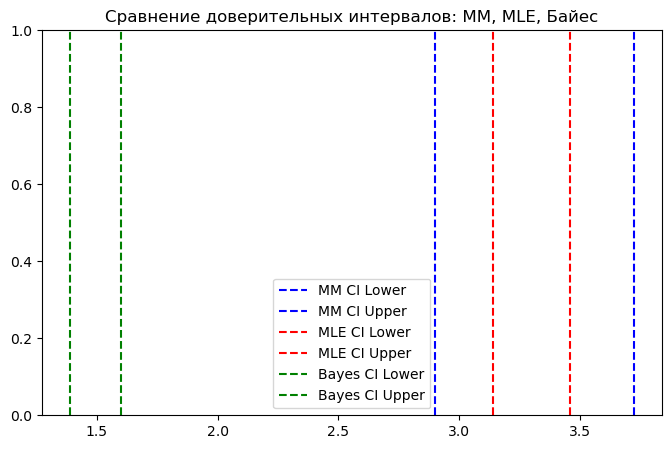

### --- Вывод результатов ---

In [20]:
print(f"Метод моментов: alpha = {alpha_mm}, ДИ = {ci_alpha_mm}")
print(f"Метод максимального правдоподобия: alpha = {alpha_mle}, ДИ = {ci_alpha_mle}")
print(f"Байесовский метод: ДИ = {ci_alpha_bayes}")

Метод моментов: alpha = 3.3113737331356337, ДИ = (2.900891592449717, 3.7218558738215504)
Метод максимального правдоподобия: alpha = 3.297472767644191, ДИ = (3.1383025984278334, 3.4566429368605482)
Байесовский метод: ДИ = [1.38915226 1.60212727]
